In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls'/content/drive/My Drive/yolo_custom_model_training'

backup/         chart.png                 predictions.jpg
backup_416/     chart_yolov3_custom1.png  predictntrial0.ipynb
backup_704/     custom_data/              Untitled
backup_old/     custom_data_old/          yolov3_custom1_last_800.weights
bad_label.list  custom_weight/            yolov3.weights
bad.list        darknet/


In [ ]:
#!unzip '/content/drive/My Drive/yolo_custom_model_training/custom_data.zip' -d'/content/drive/My Drive/yolo_custom_model_training/custom_data'

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/yolo_custom_model_training/darknet'

In [ ]:
%cd /content/drive/My Drive/yolo_custom_model_training/darknet

/content/drive/My Drive/yolo_custom_model_training/darknet


In [ ]:
!ls

0000002.jpg  cfg		     Makefile
0000010.jpg  cmake		     net_cam_v3.sh
0000014.jpg  CMakeLists.txt	     net_cam_v4.sh
0000023.jpg  darknet		     obj
0000025.jpg  DarknetConfig.cmake.in  README.md
0000026.jpg  darknet_images.py	     results
0001145.jpg  darknet.py		     scripts
0001149.jpg  darknet_video.py	     src
0001160.jpg  data		     vcpkg.json
3rdparty     image_yolov3.sh	     video_yolov3.sh
backup	     image_yolov4.sh	     video_yolov4.sh
build	     include		     yolov3_custom1_last_800.weights
build.ps1    json_mjpeg_streams.sh
build.sh     LICENSE


In [ ]:
!make

chmod +x *.sh


In [ ]:
!chmod 755 -R darknet

In [ ]:
%cd /content/drive/My Drive/yolo_custom_model_training

/content/drive/My Drive/yolo_custom_model_training


In [ ]:
!python custom_data/creating-files-data-and-name.py

In [ ]:
!python custom_data/creating-train-and-test-txt-files.py

In [ ]:
! darknet/darknet

usage: darknet/darknet <function>


In [ ]:
# To train the model from start.
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom1.cfg custom_weight/darknet53.conv.74 -mjpeg_port 8090 -map -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 535809, rewritten_bbox = 0.394730 % 

 (next mAP calculation at 7012 iterations) 
 Last accuracy mAP@0.5 = 33.68 %, best = 39.10 % 
 6585: 0.707483, 0.910373 avg loss, 0.001000 rate, 9.603108 seconds, 210720 images, 188.960258 hours left
 MJPEG-stream sent. 
Loaded: 0.000067 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.684224), count: 7, class_loss = 0.879345, iou_loss = 0.955869, total_loss = 1.835215 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000078, iou_loss = 0.000000, total_loss = 0.000078 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, 

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

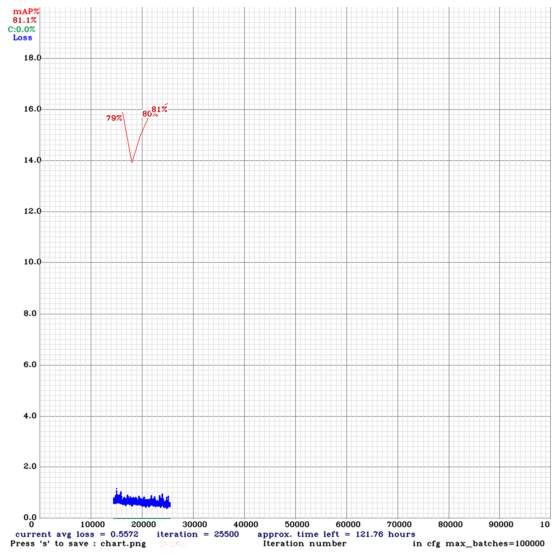

In [ ]:
imShow('chart.png')

In [ ]:
#kick off training from where it last saved
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom1.cfg darknet/yolov3_custom1_last_800.weights -mjpeg_port 8090 -map -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 678775, rewritten_bbox = 0.396008 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.792875), count: 4, class_loss = 0.025042, iou_loss = 0.226260, total_loss = 0.251302 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.005123, iou_loss = 0.000000, total_loss = 0.005123 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.728431), count: 1, class_loss = 0.017577, iou_loss = 0.072474, total_loss = 0.090051 
 total_bbox = 678780, rewritten_bbox = 0.396005 % 

 (next mAP calculation at 34265 iterations) 
 Last accuracy mAP@0.5 = 82.44 %, best = 82.44 % 
 33838: 0.507017, 0.378292 avg loss, 0.001000 rate, 13.288626 seconds, 108281

In [ ]:
# To calculate mAP
!darknet/darknet detector map custom_data/labelled_data.data darknet/cfg/yolov3_custom1.cfg darknet/yolov3_custom1_100000_704.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    704 x 704 x   3 ->  704 x 704 x  32 0.856 BF
   1 conv     64       3 x 3/ 2    704 x 704 x  32 ->  352 x 352 x  64 4.568 BF
   2 conv     32       1 x 1/ 1    352 x 352 x  64 ->  352 x 352 x  32 0.508 BF
   3 conv     64       3 x 3/ 1    352 x 352 x  32 ->  352 x 352 x  64 4.568 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 352 x 352 x  64 0.008 BF
   5 conv    128       3 x 3/ 2    352 x 352 x  64 ->  176 x 176 x 128 4.568 BF
   6 conv     64       1 x 1/ 1    176 x 176 x 128 ->  176 x 176 x  64 0.508 BF
   7 conv    128       3 x 3/ 1    176 x 176 x  64 ->  176 x 176 x 128 4.568 BF
   8 Shortcu

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!darknet/darknet detector test custom_data/labelled_data.data darknet/cfg/yolov3_custom1.cfg darknet/yolov3_custom1_final.weights darknet/0001160.jpg -thresh 0.3
imShow('darknet/predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

AttributeError: ignored